In [1]:
import distl
import numpy as np

# Multivariate Gaussian

First we'll create a [multivariate gaussian](../api/MVGaussian.md) distribution by providing the means and covariances of three parameters.

In [2]:
mvg = distl.mvgaussian([5,10, 12], 
                       np.array([[ 2,  1, -1], 
                                 [ 1,  2,  1], 
                                 [-1,  1,  2]]),
                       allow_singular=True,
                       labels=['a', 'b', 'c'])

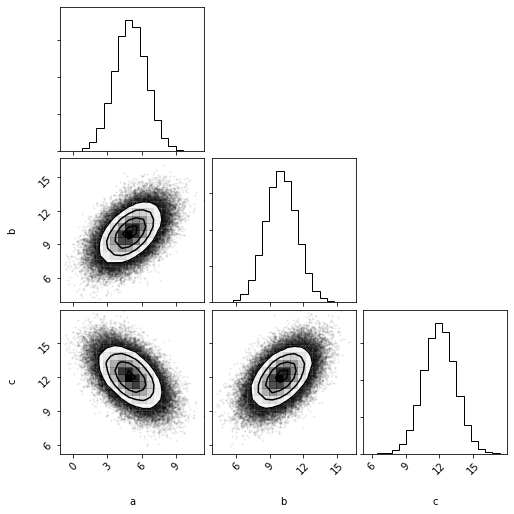

In [3]:
fig = mvg.plot(show=True)

In [4]:
mvg_a = mvg.slice('a')

In [5]:
mvg_a

<distl.mvgaussianslice dimension=0 mean=[5, 10, 12] cov=[[ 2  1 -1]
 [ 1  2  1]
 [-1  1  2]] allow_singular=True label=a)>

In [6]:
mvg_a.multivariate

<distl.mvgaussian mean=[5, 10, 12] cov=[[ 2  1 -1]
 [ 1  2  1]
 [-1  1  2]] allow_singular=True labels=['a', 'b', 'c']>

In [7]:
mvg_a.dimension

0

In [8]:
mvg_a.label

'a'

In [9]:
mvg_a.loc

5

In [10]:
mvg_a.scale

1.4142135623730951

Sampling draws from the underlying multivariate distribution but only returns the value for the requested dimension.  This means that covariances can be maintained (when using [DistributionCollection](collections.ipynb) or carefully managing the random seeds manually).

In [11]:
mvg_a.sample()

2.8759587467198218

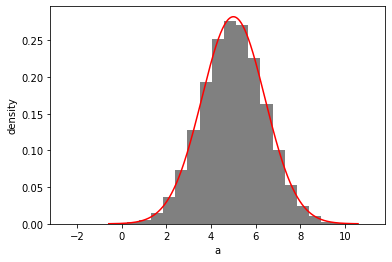

In [12]:
out = mvg_a.plot(show=True)

The exposed univariate methods (pdf, cdf, etc) are based on the univariate version (with the exception of ppf, which is disabled).  If you want the probability of drawing a value of 'a', given some values of 'b' and 'c' (for example), then must pass those three values to the underlying multivariate distribution.

**NOTE**: currently there is no ability to plot_pdf of a with fixed values of b and c.... maybe that would be a better use of "slice" and use "flatten" for this current behavior?

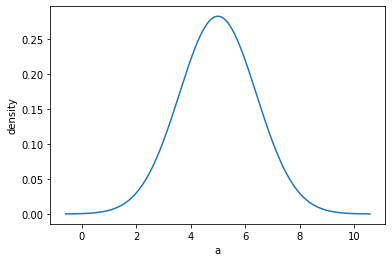

In [13]:
out = mvg_a.plot_pdf(show=True)

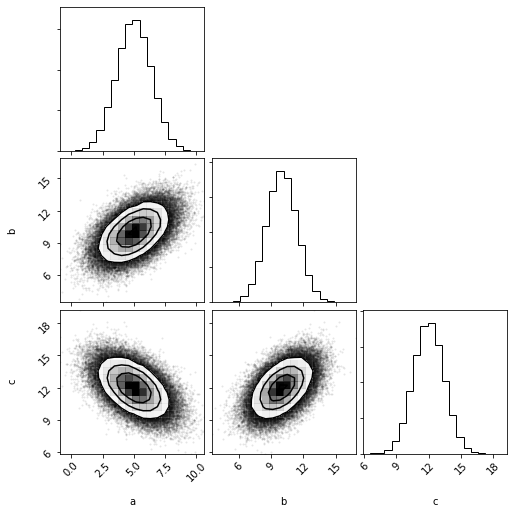

In [14]:
out = mvg_a.multivariate.plot(show=True)

In [15]:
g_a = mvg_a.to_univariate()
# same as mvg.to_univariate(dimension='a')

In [16]:
g_a

<distl.gaussian loc=5.0 scale=1.4142135623730951 label=a>

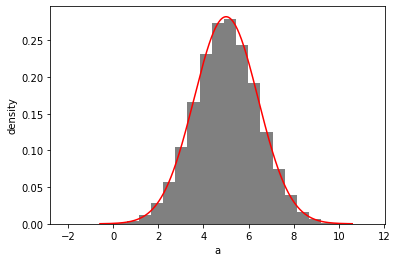

In [17]:
out = g_a.plot(show=True)

In [18]:
mvh = mvg.to_mvhistogram()

# Multivariate Histogram

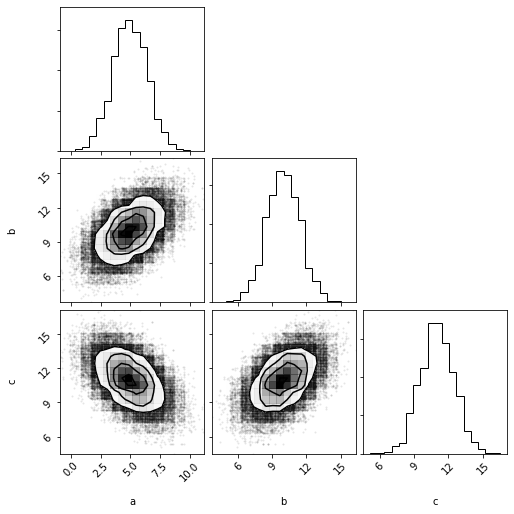

In [19]:
out = mvh.plot(show=True)

In [20]:
mvh_a = mvh.slice('a')

In [21]:
mvh_a.sample()

array([3.15930081])

In [22]:
mvh_a.sample(size=3)

array([7.43869597, 3.92138488, 3.74551932])

In [23]:
mvh_a.bins

array([-1.82355657, -0.9442288 , -0.06490102,  0.81442675,  1.69375452,
        2.57308229,  3.45241007,  4.33173784,  5.21106561,  6.09039339,
        6.96972116,  7.84904893,  8.7283767 ,  9.60770448, 10.48703225,
       11.36636002])

In [24]:
mvh_a.density

array([1.73052011e-05, 2.15078927e-04, 1.66253539e-03, 9.93071323e-03,
       4.11925589e-02, 1.16405907e-01, 2.24214837e-01, 2.98087032e-01,
       2.71996970e-01, 1.71515556e-01, 7.39142219e-02, 2.17390408e-02,
       4.51294922e-03, 6.11862466e-04, 6.92208042e-05])

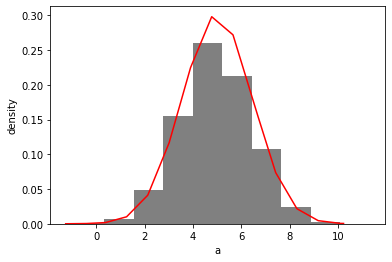

In [25]:
out = mvh_a.plot(show=True, bins=10)

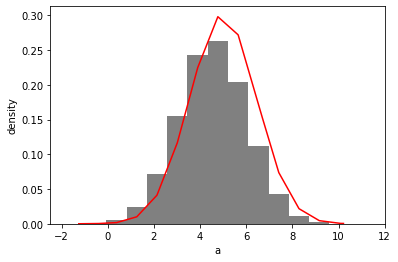

In [26]:
out = mvh_a.to_univariate().plot(show=True)